<a href="https://colab.research.google.com/github/NicoEssi/Machine_Learning_scikit-learn/blob/master/KNN_Classification_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors (K-NN) - Demo


---

One of the most popular machine learning algorithms. K-nearest-neighbor is a data classification algorithm that attempts to determine what group a data point is in by looking at the data points around it (within an arbitrary range). For example: if the majority of the points are in group A, then it is likely that the data point in question will be A rather than B, and vice versa.

## Pros

*   Interpretability and simple to understand
*   No need for assumptions of the data
*   Relatively high accuracy as an unsupervised model

## Cons

*   Computationally expensive
*   Need to choose arbitrary number of neighbors K
*   Sensitive to irrelevant data

---

## 1. Import dependencies and data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!wget https://github.com/NicoEssi/Machine_Learning_scikit-learn/raw/master/Social_Network_Ads.csv

## 2. Read CSV, split for training and test, and inspect

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')

X = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## 3. Feature scale

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 4. Initialize and fit the k-NN model

In [4]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## 5. Predict with the trained model

In [0]:
y_pred = classifier.predict(X_test)

## 6. Confusion matrix

In [6]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[62,  2],
       [ 5, 31]])

## 7. Visualization

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


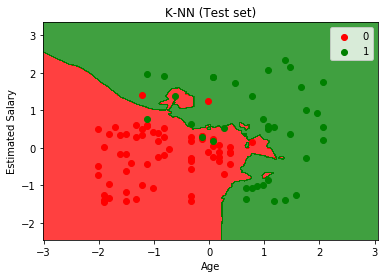

In [7]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()